<a href="https://colab.research.google.com/github/BEKKAMSHIVA/AMCAT_GEN_AI_INTERNSHIP/blob/main/EVTASK_GENAI_INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

In [72]:
df = pd.read_csv('/content/EV data set.csv')

In [73]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [74]:
df.shape

(112634, 17)

In [ ]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [75]:
# fiding the duplicate columns.
df.duplicated().sum()

0

In [76]:
# fiding the null values in the each columns with count
null_count = df.isna().sum()

print("Count of NaN or null values in each column:")
print(null_count)

Count of NaN or null values in each column:
VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                           

In [77]:
rows_with_null = df[df.isna().any(axis=1)]

rows_with_null.head(10)

VIN (1-10)        County               City State  Postal Code  \
0   JTMEB3FV6N        Monroe           Key West    FL        33040   
1   1G1RD6E45D         Clark           Laughlin    NV        89029   
12  3C3CFFGE3G     St. Clair          Mascoutah    IL        62258   
16  1N4AZ0CP4D        Pierce           Kapowsin    WA        98344   
19  5YJXCAE28G      Saratoga  Greenfield Center    NY        12833   
21  1G1RD6S55H       Stevens    Nine Mile Falls    WA        99026   
41  5YJSA1E22G  Newport News       Newport News    VA        23602   
44  WBY1Z4C5XG       Jackson              Altus    OK        73521   
45  5YJ3E1EB9K      Thurston            Olympia    WA        98502   
47  5YJ3E1EB3J          Lake      Highland Park    IL        60035   

    Model Year       Make       Model                   Electric Vehicle Type  \
0         2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1         2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
12        2016       FIAT         500          Battery Electric Vehicle (BEV)   
16        2013     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
19        2016      TESLA     MODEL X          Battery Electric Vehicle (BEV)   
21        2017  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
41        2016      TESLA     MODEL S          Battery Electric Vehicle (BEV)   
44        2016        BMW          I3  Plug-in Hybrid Electric Vehicle (PHEV)   
45        2019      TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
47        2018      TESLA     MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              42   
1            Clean Alternative Fuel Vehicle Eligible              38   
12           Clean Alternative Fuel Vehicle Eligible              84   
16           Clean Alternative Fuel Vehicle Eligible              75   
19           Clean Alternative Fuel Vehicle Eligible             200   
21           Clean Alternative Fuel Vehicle Eligible              53   
41           Clean Alternative Fuel Vehicle Eligible             210   
44           Clean Alternative Fuel Vehicle Eligible              72   
45           Clean Alternative Fuel Vehicle Eligible             220   
47           Clean Alternative Fuel Vehicle Eligible             215   

    Base MSRP  Legislative District  DOL Vehicle ID  \
0           0                   NaN       198968248   
1           0                   NaN         5204412   
12          0                   NaN       153786167   
16          0                   2.0       237061968   
19          0                   NaN       218050878   
21          0                   7.0       141964049   
41          0                   NaN       111593331   
44          0                   NaN       212273260   
45          0                  35.0       112688474   
47          0                   NaN       128455015   

               Vehicle Location  \
0     POINT (-81.80023 24.5545)   
1   POINT (-114.57245 35.16815)   
12   POINT (-89.79939 38.49028)   
16                          NaN   
19    POINT (-73.84643 43.1284)   
21  POINT (-117.54392 47.77676)   
41   POINT (-76.53585 37.10499)   
44   POINT (-99.33374 34.63783)   
45  POINT (-122.92333 47.03779)   
47    POINT (-87.7992 42.18569)   

                                 Electric Utility  2020 Census Tract  
0                                             NaN        12087972100  
1                                             NaN        32003005702  
12                                            NaN        17163504356  
16  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53053073119  
19                                            NaN        36091060601  
21                                            NaN        53065951402  
41                                            NaN        51

In [78]:
# Droping rows with any NaN values
df = df.dropna(axis=0)



In [79]:
#Note: we can see the shape of the data frame has been changed because NaN values are removed.
df.shape

(112152, 17)

In [80]:
# checking  the null values in the each columns with count
null_count = df.isna().sum()

print("Count of NaN or null values in each column:")
print(null_count)

Count of NaN or null values in each column:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [81]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112152.000000  112152.000000   112152.000000  112152.000000   
mean    98258.856659    2019.004494       87.829651    1793.882320   
std       302.889935       2.891859      102.336645   10785.259118   
min     98001.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99403.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112152.000000    1.121520e+05       1.121520e+05  
mean              29.817703    1.994712e+08       5.303958e+10  
std               14.698726    9.401842e+07       1.617788e+07  
min                1.000000    4.777000e+03       5.300195e+10  
25%               18.000000    1.484164e+08       5.303301e+10  
50%               34.000000    1.923916e+08       5.303303e+10  
75%               43.000000    2.191885e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.307794e+10

# TASK_1 (Univariate and Bivariate)

# Non - Visual Analysis

In [83]:
# Find nunique, unique values, and value counts
nunique_val, unique_vals, value_counts = df['County'].nunique(), df['County'].unique(), df['County'].value_counts()

print("Number of unique values:", nunique_val)
print("Value counts:\n", value_counts)
print("Unique values:", unique_vals)

Number of unique values: 39
Value counts:
 County
King            58980
Snohomish       12412
Pierce           8525
Clark            6681
Thurston         4109
Kitsap           3828
Whatcom          2839
Spokane          2785
Benton           1376
Island           1298
Skagit           1228
Clallam           728
San Juan          717
Jefferson         698
Chelan            654
Yakima            617
Cowlitz           569
Mason             547
Lewis             431
Grays Harbor      402
Kittitas          392
Franklin          365
Grant             335
Walla Walla       312
Douglas           221
Whitman           177
Klickitat         175
Okanogan          149
Pacific           145
Skamania          139
Stevens            91
Asotin             48
Wahkiakum          39
Adams              34
Pend Oreille       32
Lincoln            30
Ferry              27
Columbia           13
Garfield            4
Name: count, dtype: int64
Unique values: ['Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston' 

In [84]:
nunique_val, unique_vals, value_counts = df['City'].nunique(), df['City'].unique(), df['City'].value_counts()

print("Number of unique values:", nunique_val)
print("Value counts:\n", value_counts)
print("Unique values:", unique_vals)

Number of unique values: 435
Value counts:
 City
Seattle           20295
Bellevue           5919
Redmond            4199
Vancouver          4013
Kirkland           3598
                  ...  
Walla Walla Co        1
Clallam Bay           1
Malott                1
Rockport              1
Uniontown             1
Name: count, Length: 435, dtype: int64
Unique values: ['Yakima' 'Concrete' 'Everett' 'Bothell' 'Mukilteo' 'Clinton' 'Anacortes'
 'Lacey' 'Moses Lake' 'Rochester' 'Burlington' 'Marysville' 'Lynnwood'
 'Edmonds' 'Olympia' 'Seattle' 'Auburn' 'Langley' 'Snohomish' 'Bremerton'
 'Pullman' 'Spokane' 'Suquamish' 'Monroe' 'Keyport' 'Maple Valley' 'Kent'
 'Lake Forest Park' 'Poulsbo' 'Redmond' 'Issaquah' 'Longview' 'Tacoma'
 'Ellensburg' 'Burien' 'Gig Harbor' 'South Hill' 'Sammamish' 'Westport'
 'Vancouver' 'Airway Heights' 'Mercer Island' 'Stanwood' 'Tumwater'
 'Bainbridge Island' 'Entiat' 'Lakewood' 'Lake Tapps' 'Bellevue'
 'Kirkland' 'Newcastle' 'Port Orchard' 'Bellingham' 'Richland'
 

In [85]:
nunique_val, unique_vals, value_counts = df['Make'].nunique(), df['Make'].unique(), df['Make'].value_counts()

print("Number of unique values:", nunique_val)
print("Value counts:\n", value_counts)
print("Unique values:", unique_vals)

Number of unique values: 34
Value counts:
 Make
TESLA             51883
NISSAN            12846
CHEVROLET         10140
FORD               5780
BMW                4660
KIA                4469
TOYOTA             4368
VOLKSWAGEN         2507
AUDI               2320
VOLVO              2256
CHRYSLER           1780
HYUNDAI            1407
JEEP               1143
RIVIAN              883
FIAT                820
PORSCHE             817
HONDA               788
MINI                631
MITSUBISHI          585
POLESTAR            557
MERCEDES-BENZ       503
SMART               271
JAGUAR              218
LINCOLN             167
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               19
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64
Unique values: ['NISSAN' 'CHEVROLET' 'FORD' 'TESLA' 'KIA' 'AUDI' 'BMW' 'PORSCHE' 'FIAT'
 'CADILLAC' 'MITSUBISH

In [86]:
nunique_val, unique_vals, value_counts = df['Model'].nunique(), df['Model'].unique(), df['Model'].value_counts()

print("Number of unique values:", nunique_val)
print("Value counts:\n", value_counts)
print("Unique values:", unique_vals)

Number of unique values: 114
Value counts:
 Model
MODEL 3        23042
MODEL Y        17086
LEAF           12846
MODEL S         7346
BOLT EV         4895
               ...  
745LE              2
S-10 PICKUP        1
SOLTERRA           1
918                1
FLYING SPUR        1
Name: count, Length: 114, dtype: int64
Unique values: ['LEAF' 'BOLT EV' 'FUSION' 'MODEL 3' 'SOUL' 'Q5 E' 'MODEL X' 'VOLT' 'X5'
 '530E' 'TAYCAN' 'X3' 'A3' 'SOUL EV' 'C-MAX' '500' 'MODEL S' 'F-150' 'CT6'
 'I3' 'MODEL Y' 'NIRO' 'OUTLANDER' 'PACIFICA' 'R1T' 'CLARITY'
 'KONA ELECTRIC' 'XC40' 'ID.4' 'PRIUS PLUG-IN' 'MUSTANG MACH-E'
 'EQB-CLASS' 'RAV4 PRIME' 'E-GOLF' 'PRIUS PRIME' 'C40' 'SORENTO' 'XC60'
 'CAYENNE' 'WRANGLER' 'COUNTRYMAN' 'S60' 'EV6' 'FORTWO ELECTRIC DRIVE'
 'GRAND CHEROKEE' '330E' 'CROSSTREK' 'IONIQ 5' 'IONIQ' 'E-TRON' 'ROADSTER'
 'KONA' 'XC90' 'SPARK' 'PS2' 'A7' 'HARDTOP' 'ESCAPE' 'LUCID AIR'
 'E-TRON SPORTBACK' 'Q5' 'RAV4' 'AVIATOR' 'E-TRON GT' 'EDV' 'IX' 'FORTWO'
 'I-PACE' 'SANTA FE' 'B-CLASS' 'KA

In [87]:
nunique_val, unique_vals, value_counts = df['Electric Vehicle Type'].nunique(), df['Electric Vehicle Type'].unique(), df['Electric Vehicle Type'].value_counts()

print("Number of unique values:", nunique_val)
print("Value counts:\n", value_counts)
print("Unique values:", unique_vals)

Number of unique values: 2
Value counts:
 Electric Vehicle Type
Battery Electric Vehicle (BEV)            85732
Plug-in Hybrid Electric Vehicle (PHEV)    26420
Name: count, dtype: int64
Unique values: ['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


## observations

*Diversity of EVs:*

We have electric vehicles (EVs) from 39 different nations.
King County has the most EVs (5,890).
Garfield has the fewest EVs (4).

*Cities Represented:*

There are 20,295 EVs from 435 different cities.
Seattle has the highest number of EVs.

*Car Manufacturers:*

The dataset includes 34 distinct EV car manufacturers.
Tesla has the most vehicles with 51,883 EVs.
Bentley has at least three EVs.

*Unique Vehicle Numbers:*

The dataset contains 114 distinct numbers from all EV companies models.

*Vehicle Ratings:*

Compared to Plug-in Hybrid Electric Vehicles (PHEVs), the majority of Battery Electric Vehicles (BEVs) have an 85732 rating.

In [88]:

def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [ ]:
numerical_univariate_analysis(numerical_df)

********** Postal Code **********
min       98001.000000
max       99403.000000
mean      98258.856659
median    98121.000000
std         302.889935
Name: Postal Code, dtype: float64

********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.004494
median    2020.000000
std          2.891859
Name: Model Year, dtype: float64

********** Electric Range **********
min         0.000000
max       337.000000
mean       87.829651
median     32.000000
std       102.336645
Name: Electric Range, dtype: float64

********** Base MSRP **********
min            0.000000
max       845000.000000
mean        1793.882320
median         0.000000
std        10785.259118
Name: Base MSRP, dtype: float64

********** Legislative District **********
min        1.000000
max       49.000000
mean      29.817703
median    34.000000
std       14.698726
Name: Legislative District, dtype: float64

********** DOL Vehicle ID **********
min       4.777000e+03
max       4.792548e+08
mean

# Visual Analysis

In [90]:
discrete_df = df.select_dtypes(include=['object'])


In [99]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [101]:
categorical_columns = [ 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility' ]

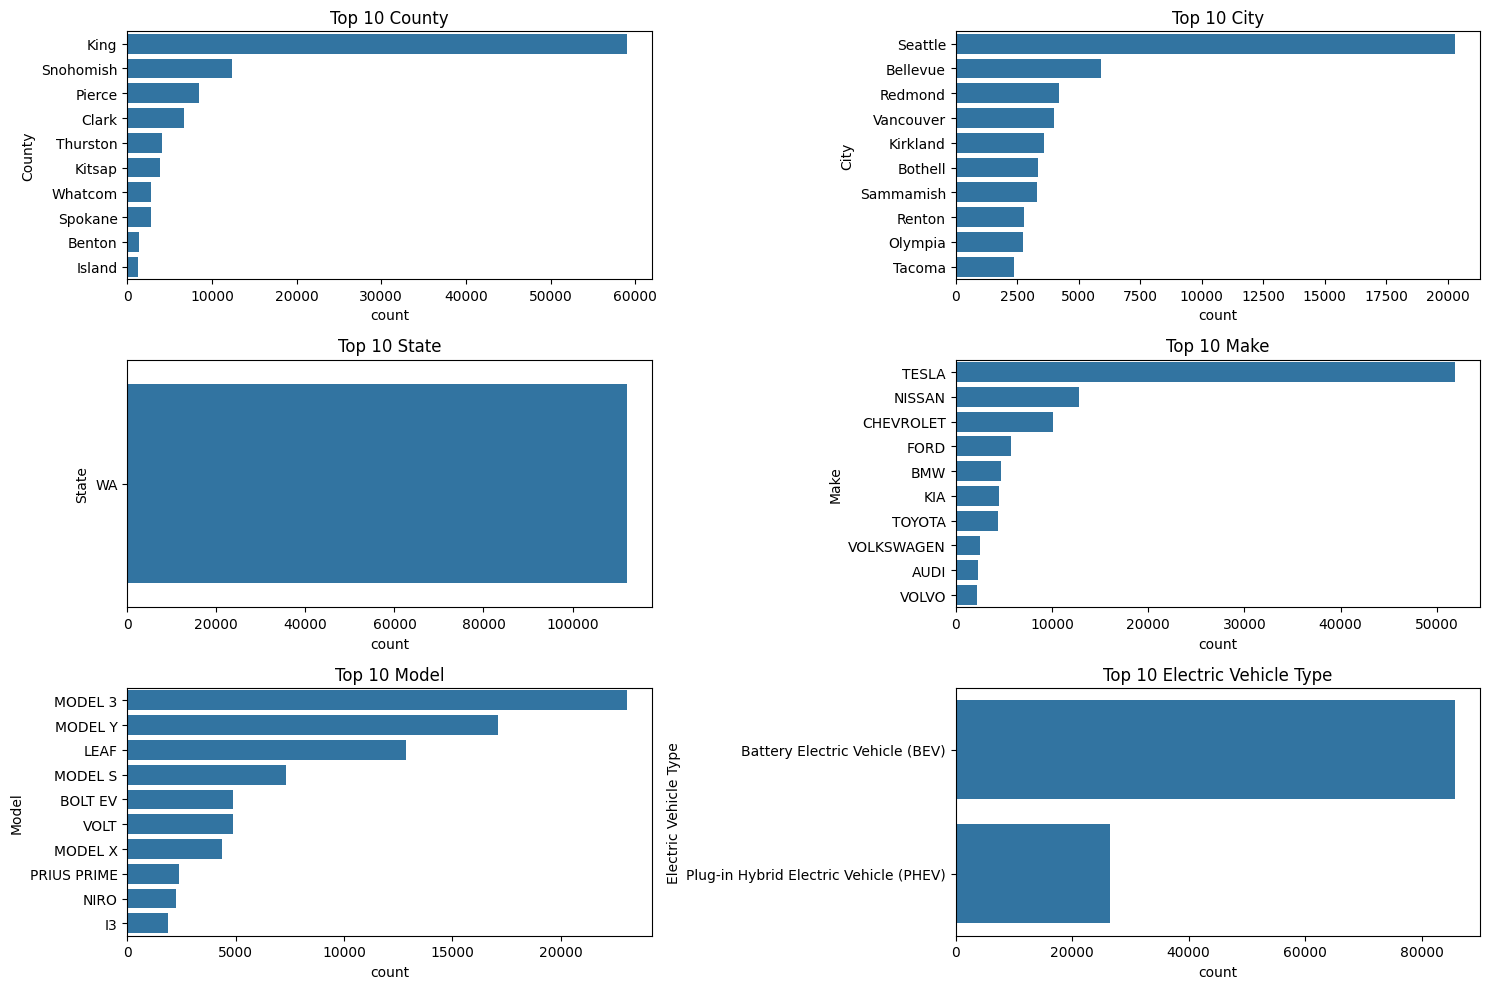

In [102]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1): # Limiting to first 6 for cla
 plt.subplot(3, 2, i)
 sns.countplot(y=df[column], order=df[column].value_counts().index[:10])
 plt.title(f'Top 10 {column}')
plt.tight_layout()
plt.show()


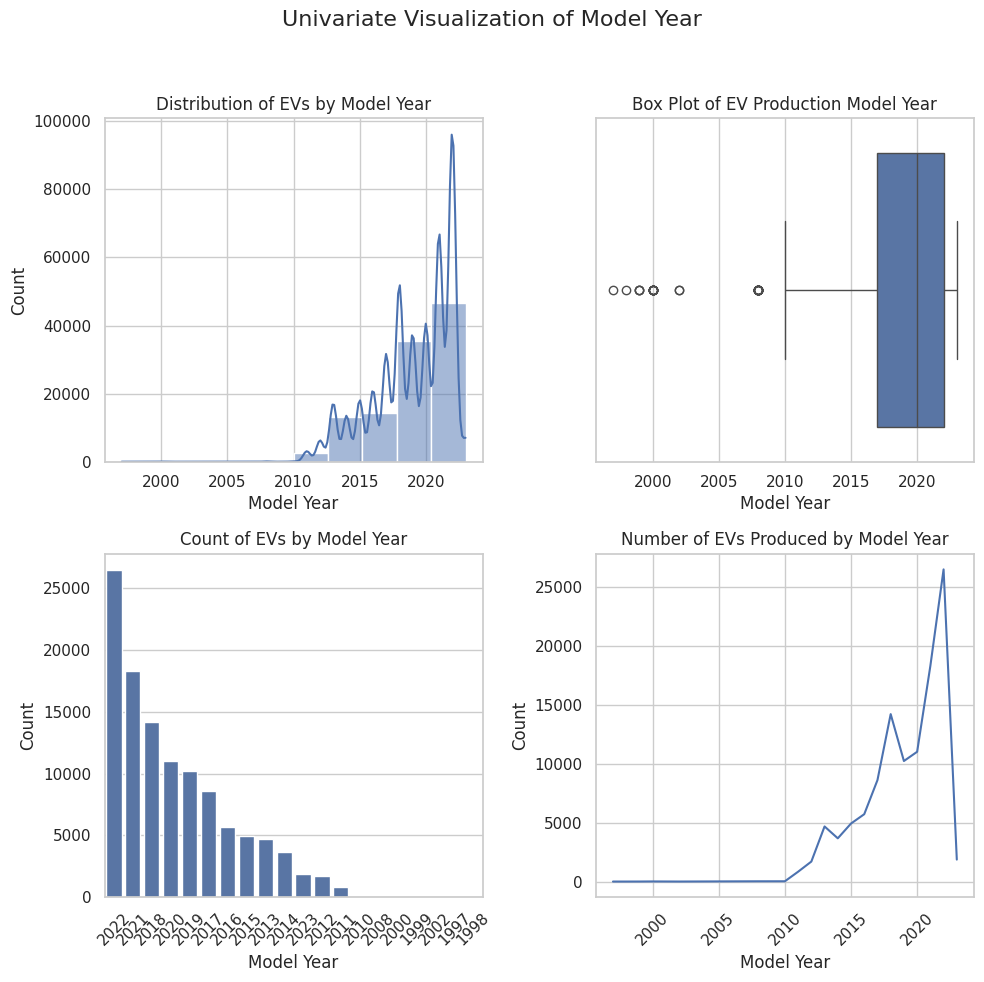

In [103]:

sns.set(style="whitegrid")

# Create a figure with 2 rows and 2 columns for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Univariate Visualization of Model Year', fontsize=16)

# 1. Histogram with KDE
sns.histplot(df['Model Year'], bins=10, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of EVs by Model Year')
axs[0, 0].set_xlabel('Model Year')
axs[0, 0].set_ylabel('Count')

# 2. Box Plot
sns.boxplot(x=df['Model Year'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of EV Production Model Year')
axs[0, 1].set_xlabel('Model Year')

# 3. Count Plot
sns.countplot(x=df['Model Year'], order=df['Model Year'].value_counts().index, ax=axs[1, 0])
axs[1, 0].set_title('Count of EVs by Model Year')
axs[1, 0].set_xlabel('Model Year')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Line Plot
yearly_counts = df['Model Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, ax=axs[1, 1])
axs[1, 1].set_title('Number of EVs Produced by Model Year')
axs[1, 1].set_xlabel('Model Year')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the main title
plt.show()


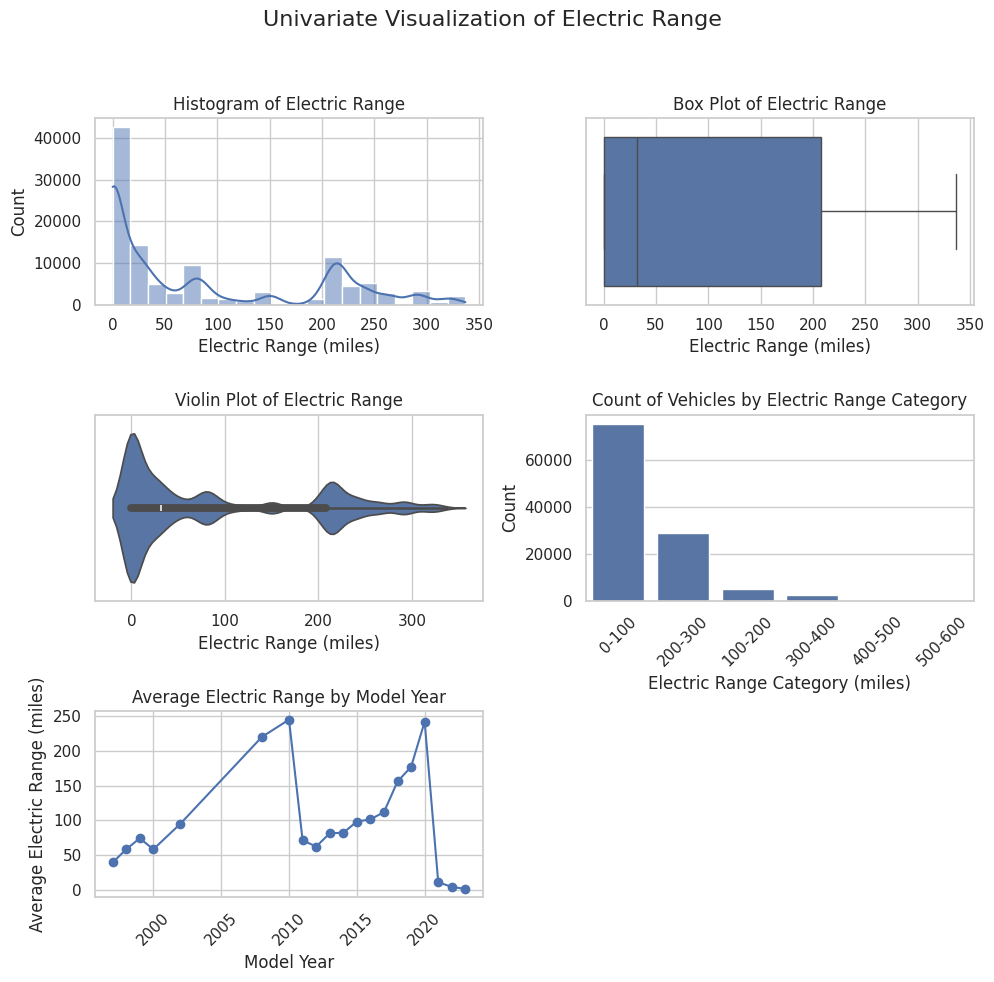

In [104]:


# Set the visual style
sns.set(style="whitegrid")

# Create a figure with 3 rows and 2 columns for subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Univariate Visualization of Electric Range', fontsize=16)

# 1. Histogram with KDE
sns.histplot(df['Electric Range'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Electric Range')
axs[0, 0].set_xlabel('Electric Range (miles)')
axs[0, 0].set_ylabel('Count')

# 2. Box Plot
sns.boxplot(x=df['Electric Range'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Electric Range')
axs[0, 1].set_xlabel('Electric Range (miles)')

# 3. Violin Plot
sns.violinplot(x=df['Electric Range'], ax=axs[1, 0])
axs[1, 0].set_title('Violin Plot of Electric Range')
axs[1, 0].set_xlabel('Electric Range (miles)')

# 4. Count Plot (if Electric Range is categorized)
# Define bins for Electric Range (example)
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600']
df['Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=False)

sns.countplot(x='Range Category', data=df, order=df['Range Category'].value_counts().index, ax=axs[1, 1])
axs[1, 1].set_title('Count of Vehicles by Electric Range Category')
axs[1, 1].set_xlabel('Electric Range Category (miles)')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

# 5. Line Plot (Average Electric Range by Model Year)
# Example: Assuming you want to see the average Electric Range per year
avg_range_per_year = df.groupby('Model Year')['Electric Range'].mean()

axs[2, 0].plot(avg_range_per_year.index, avg_range_per_year.values, marker='o')
axs[2, 0].set_title('Average Electric Range by Model Year')
axs[2, 0].set_xlabel('Model Year')
axs[2, 0].set_ylabel('Average Electric Range (miles)')
axs[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the main title
plt.show()



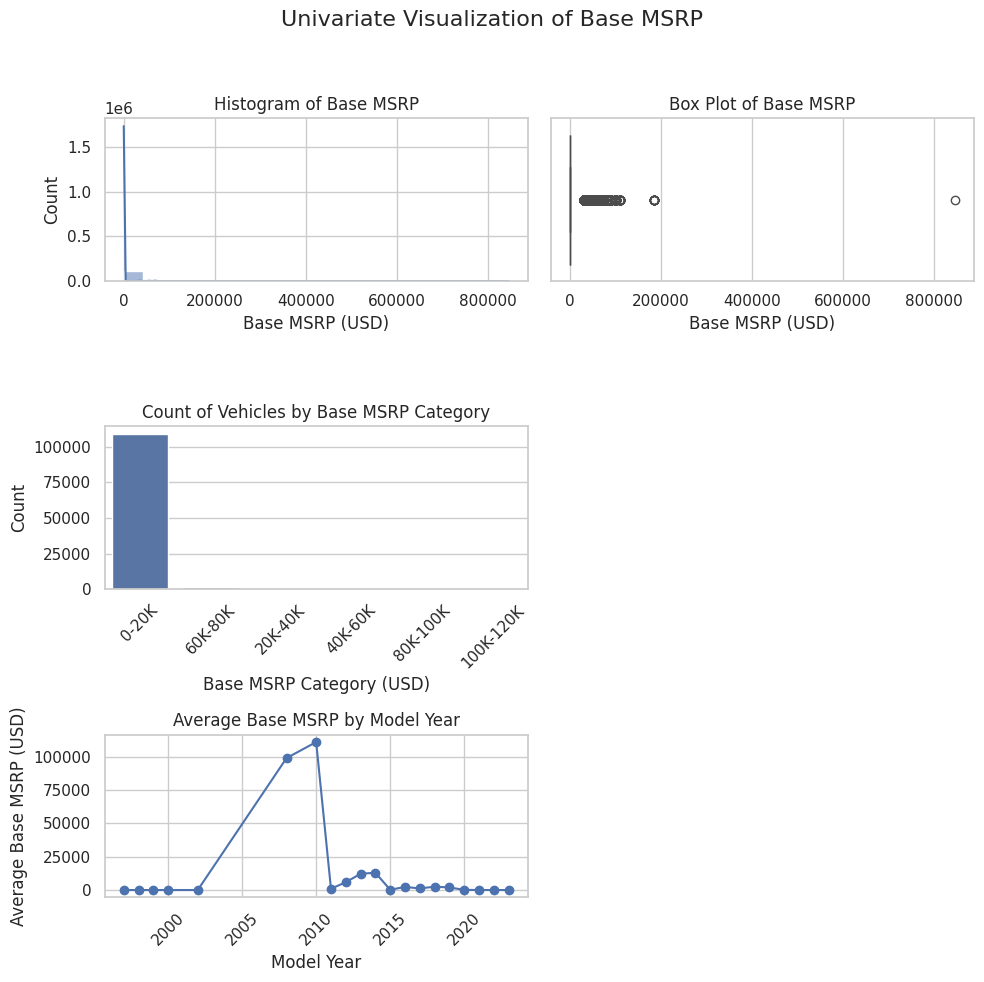

In [105]:

sns.set(style="whitegrid")

# Create a figure with 3 rows and 2 columns for subplots
fig, axs = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('Univariate Visualization of Base MSRP', fontsize=16)

# 1. Histogram with KDE
sns.histplot(df['Base MSRP'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Base MSRP')
axs[0, 0].set_xlabel('Base MSRP (USD)')
axs[0, 0].set_ylabel('Count')

# 2. Box Plot
sns.boxplot(x=df['Base MSRP'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Base MSRP')
axs[0, 1].set_xlabel('Base MSRP (USD)')

# 3. Count Plot (if Base MSRP is categorized)
# Define bins for Base MSRP (example)
msrp_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]
msrp_labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-120K']
df['MSRP Category'] = pd.cut(df['Base MSRP'], bins=msrp_bins, labels=msrp_labels, right=False)

sns.countplot(x='MSRP Category', data=df, order=df['MSRP Category'].value_counts().index, ax=axs[1, 0])
axs[1, 0].set_title('Count of Vehicles by Base MSRP Category')
axs[1, 0].set_xlabel('Base MSRP Category (USD)')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Line Plot (Average Base MSRP by Model Year)
# Example: Assuming you want to see the average Base MSRP per year
avg_msrp_per_year = df.groupby('Model Year')['Base MSRP'].mean()

axs[2, 0].plot(avg_msrp_per_year.index, avg_msrp_per_year.values, marker='o')
axs[2, 0].set_title('Average Base MSRP by Model Year')
axs[2, 0].set_xlabel('Model Year')
axs[2, 0].set_ylabel('Average Base MSRP (USD)')
axs[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplots
fig.delaxes(axs[1, 1])
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the main title
plt.show()


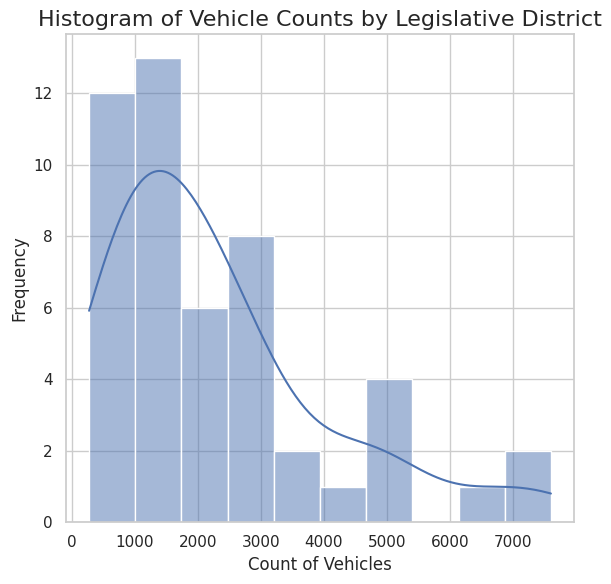

In [106]:

# Set the visual style
sns.set(style="whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(6, 6))
plt.title('Histogram of Vehicle Counts by Legislative District', fontsize=16)

# Plot the histogram of vehicle counts
sns.histplot(df['Legislative District'].value_counts(), bins=10, kde=True)

# Set labels
plt.xlabel('Count of Vehicles')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


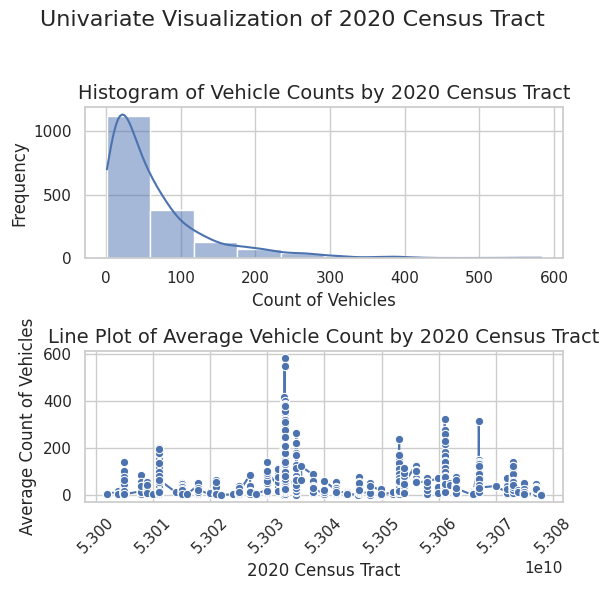

In [107]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure with 2 rows for subplots and size 6x6
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
fig.suptitle('Univariate Visualization of 2020 Census Tract', fontsize=16)

# 1. Histogram for 2020 Census Tract
sns.histplot(df['2020 Census Tract'].value_counts(), bins=10, kde=True, ax=axs[0])
axs[0].set_title('Histogram of Vehicle Counts by 2020 Census Tract', fontsize=14)
axs[0].set_xlabel('Count of Vehicles')
axs[0].set_ylabel('Frequency')

# 2. Line Plot for 2020 Census Tract
avg_count_per_tract = df['2020 Census Tract'].value_counts().sort_index()
sns.lineplot(x=avg_count_per_tract.index, y=avg_count_per_tract.values, marker='o', ax=axs[1])
axs[1].set_title('Line Plot of Average Vehicle Count by 2020 Census Tract', fontsize=14)
axs[1].set_xlabel('2020 Census Tract')
axs[1].set_ylabel('Average Count of Vehicles')

# Rotate x-axis labels for better readability
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the main title
plt.show()

In [10]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [109]:
num_vs_num = df[['Model Year', 'Electric Range', 'Base MSRP','Legislative District','Electric Utility','2020 Census Tract']]


In [110]:
# Calculate the correlation matrix, but only for numeric columns
correlation_matrix = num_vs_num.select_dtypes(include=np.number).corr()

# Print the correlation matrix
print(correlation_matrix)

                      Model Year  Electric Range  Base MSRP  \
Model Year              1.000000       -0.288952  -0.229369   
Electric Range         -0.288952        1.000000   0.085310   
Base MSRP              -0.229369        0.085310   1.000000   
Legislative District    0.010423        0.024383   0.012474   
2020 Census Tract      -0.030528       -0.015352  -0.002684   

                      Legislative District  2020 Census Tract  
Model Year                        0.010423          -0.030528  
Electric Range                    0.024383          -0.015352  
Base MSRP                         0.012474          -0.002684  
Legislative District              1.000000          -0.111296  
2020 Census Tract                -0.111296           1.000000  


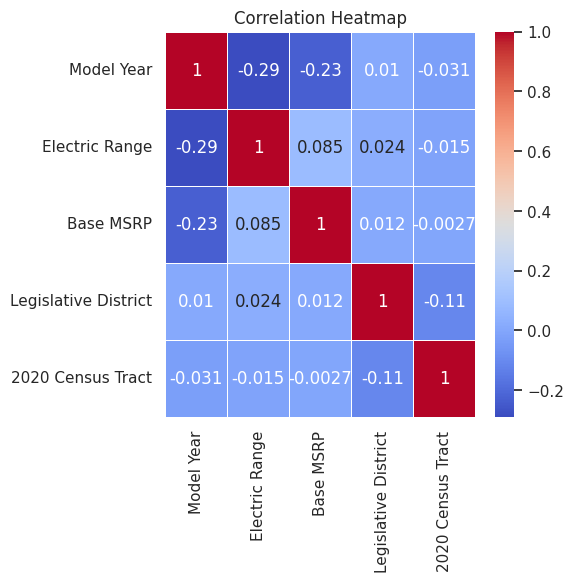

In [111]:
# Calculate the correlation matrix, but only for numeric columns
correlation_matrix = num_vs_num.select_dtypes(include=np.number).corr()

# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title for clarity
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

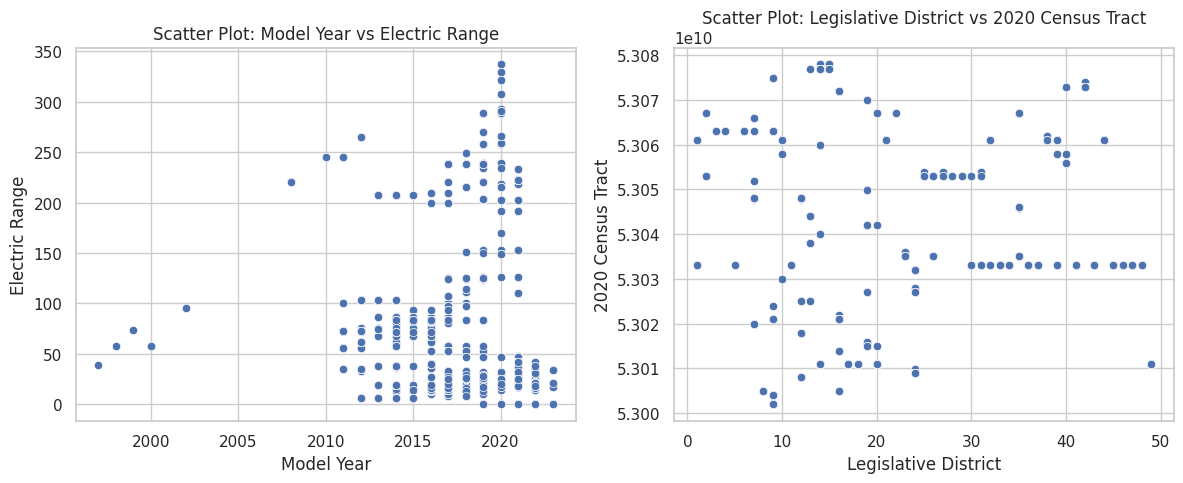

In [112]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot
sns.scatterplot(data=num_vs_num, x='Model Year', y='Electric Range', ax=axes[0])
axes[0].set_title('Scatter Plot: Model Year vs Electric Range')

# Second scatter plot
sns.scatterplot(data=num_vs_num, x='Legislative District', y='2020 Census Tract', ax=axes[1])
axes[1].set_title('Scatter Plot: Legislative District vs 2020 Census Tract')

# Display the plots
plt.tight_layout()
plt.show()


In [113]:
cat_cat=df[['County', 'City', 'State','Make', 'Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']]

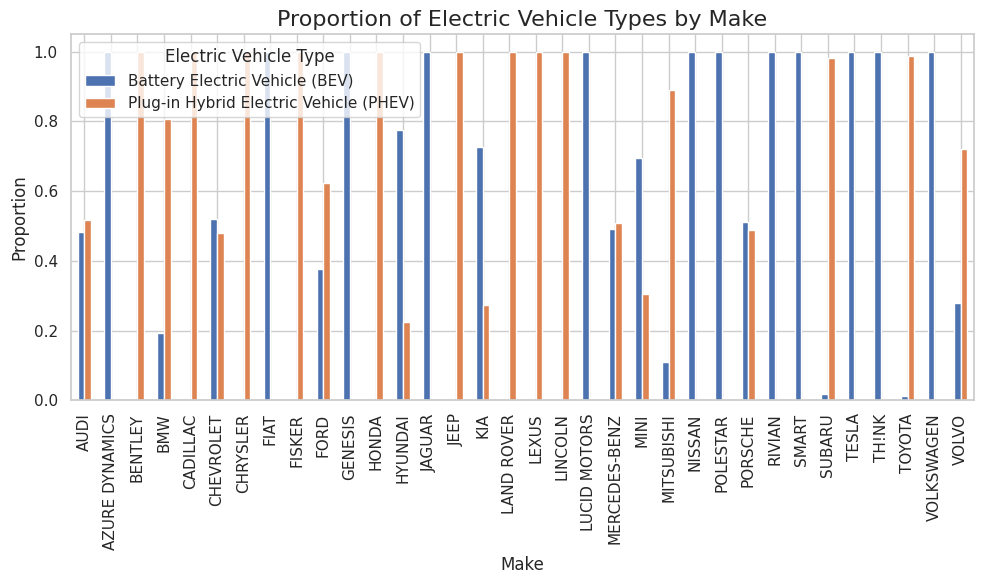

In [114]:
# Create a frequency table with normalization
tab = pd.crosstab(df['Make'], df['Electric Vehicle Type'], normalize='index')

# Create a vertical bar plot
tab.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Proportion of Electric Vehicle Types by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

(array([1, 2, 3]),
 [Text(1, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(2, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(3, 0, 'Not eligible due to low battery range')])

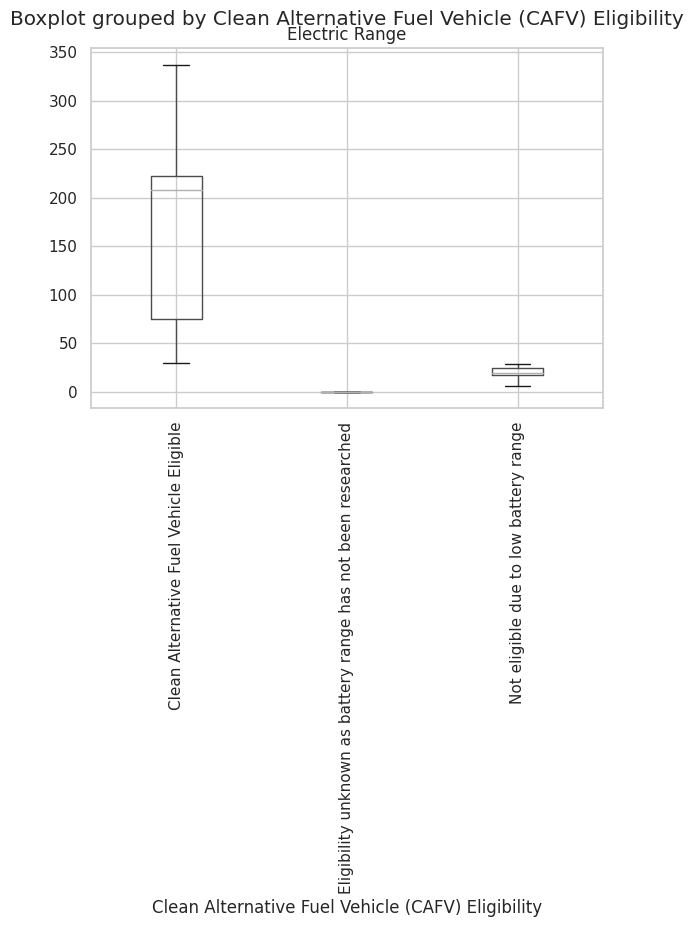

In [115]:


df.boxplot(by="Clean Alternative Fuel Vehicle (CAFV) Eligibility", column=['Electric Range'])
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
# Show the p

# TASK_2

#### plotly.express to display the number of EV vehicles based on location



In [116]:

import plotly.express as px


In [117]:

ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')



In [118]:
#count of EVs per state
ev_count_by_state = df['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']
# Create the Choropleth map
fig = px.choropleth(ev_count_by_state,
 locations='State',
 locationmode="USA-states",
 color='EV_Count',
 scope="usa",
 color_continuous_scale="Viridis",
 title="Number of Electric Vehicles by State")
# Update the layout
fig.update_layout(
 title_x=0.5,
 geo_scope='usa',
)
fig.show()
# Save the plot as an HTML file
fig.write_html("ev_choropleth_map.html")
print("Choropleth map has been created and saved as 'ev_choropleth_map.html'.")
print("\
Top 5 states by EV count:")
print(ev_count_by_state.head().to_string(index=False))

Choropleth map has been created and saved as 'ev_choropleth_map.html'.
Top 5 states by EV count:
State  EV_Count
   WA    112152


In [119]:
import pandas as pd
import plotly.express as px

# Count the number of EVs per postal code
ev_count_by_postal = df['Postal Code'].value_counts().reset_index()
ev_count_by_postal.columns = ['Postal Code', 'EV_Count']
# Merge the count with the original dataframe to get location data
df_merged = df.merge(ev_count_by_postal, on='Postal Code')
# Extract latitude and longitude from the 'Vehicle Location' column
df_merged['Longitude'] = df_merged['Vehicle Location'].str.extract('POINT \(([-\d.]+) ')
df_merged['Latitude'] = df_merged['Vehicle Location'].str.extract('([-\d.]+)\)')
# Convert to numeric
df_merged['Longitude'] = pd.to_numeric(df_merged['Longitude'])
df_merged['Latitude'] = pd.to_numeric(df_merged['Latitude'])
df_merged['Longitude'] = pd.to_numeric(df_merged['Longitude'])
df_merged['Latitude'] = pd.to_numeric(df_merged['Latitude'])

In [120]:
# Create the scatter plot on a map
fig = px.scatter_mapbox(df_merged,
 lat='Latitude',
 lon='Longitude',
 color='EV_Count',
 size='EV_Count',
 hover_name='Postal Code',
 hover_data=['City', 'State', 'EV_Count'],
 color_continuous_scale="Viridis",
 size_max=15,
 zoom=3,
 title="Number of Electric Vehicles by Postal Code")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Save the plot as an HTML file
fig.write_html("ev_postal_code_map.html")
fig.show()
print("Scatter map based on postal codes has been created and saved as 'ev_postal_code_map.html'")
print("\
Top 10 postal codes by EV count:")
print(ev_count_by_postal.head(10).to_string(index=False))
# Display some statistics
print("\
Total number of unique postal codes:", len(ev_count_by_postal))
print("Average number of EVs per postal code:", round(ev_count_by_postal['EV_Count'].mean()))
print("Median number of EVs per postal code:", ev_count_by_postal['EV_Count'].median())
print("Maximum number of EVs in a single postal code:", ev_count_by_postal['EV_Count'].max())

Scatter map based on postal codes has been created and saved as 'ev_postal_code_map.html'
Top 10 postal codes by EV count:
 Postal Code  EV_Count
       98052      2914
       98033      2059
       98004      2001
       98115      1878
       98006      1851
       98012      1850
       98072      1661
       98040      1639
       98074      1594
       98034      1578
Total number of unique postal codes: 516
Average number of EVs per postal code: 217
Median number of EVs per postal code: 49.0
Maximum number of EVs in a single postal code: 2914


# TASK_3
#Racing Bar plot

In [121]:
!pip install bar-chart-race


In [123]:
import bar_chart_race as bcr
import warnings


In [127]:
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Step 2: Create a list of all unique makes
unique_makes = df['Make'].unique()

# Step 3: Ensure all makes appear in every year by filling missing combinations
all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

# Step 4: Convert EV Count to integer (since it was NaN before)
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 5: Create the animated racing bar plot with increased height
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='Make',  # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)

# Step 6: Show the plot
fig.show()